In [1]:
# Defined helper function
def average(list):    
    if (list is None):
        return list
    
    sum = 0
    for i in list:
        sum = sum + i
    sum = sum / len(list)
    return sum

Understanding human emotions paves the way to understanding people's needs better and, ultimately, providing better service. Speech Emotion Recognition (SER) is one of these tasks, aiming to recognize the emotion from speech irrespective of the semantic contents. </br></br>

<b>Data Description:</b> This dataset is a subset of the Toronto emotional speech set (TESS) in which a set of 200 target words were spoken in the carrier phrase "Say the word _____' by multiple actresses (aged 26 and 64 years), and recordings were made of the set portraying each of seven emotions. In this assignment the dataset used in this assignment contains 400 audio clips for 4 emotions: sad, angry, happy, and fear. </br></br>

Please download the dataset here: https://drive.google.com/drive/u/2/folders/14GKIR6RYKCYd-L3ppqfoHMH0anTgiz8H

<h1>Step 1: Split the dataset into training and testing sets.</h1></br>
In the dataset, we have 100 audio clips for each of the abovementioned 4 emotions. For each emotion category, randomly select 70 as training samples and the remaining 30 as testing samples. 

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

filePath = "data_folder/"
happyFiles = np.array([filename for filename in os.listdir(filePath + "happy")])
sadFiles = np.array([filename for filename in os.listdir(filePath + "sad")])
angryFiles = np.array([filename for filename in os.listdir(filePath + "angry")])
fearFiles = np.array([filename for filename in os.listdir(filePath + "fear")])

happyTrain, happyTest = train_test_split(happyFiles, test_size = 0.3)
sadTrain, sadTest = train_test_split(sadFiles, test_size = 0.3)
angryTrain, angryTest = train_test_split(angryFiles, test_size = 0.3)
fearTrain, fearTest = train_test_split(fearFiles, test_size = 0.3)

len(happyTrain)

70

<h1>Step 2: Exploratory Data Analysis.</h1></br>
This stage is the very initial stage of your data analysis. You may want to know the label distribution of the dataset. You may also want to select sample audio, listen to them and plot them in both the time and frequency domain.

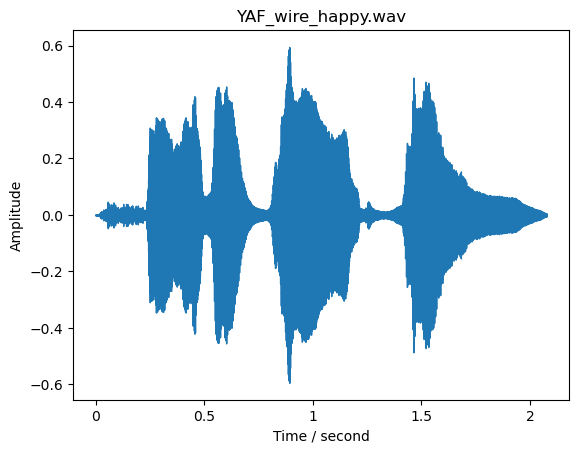

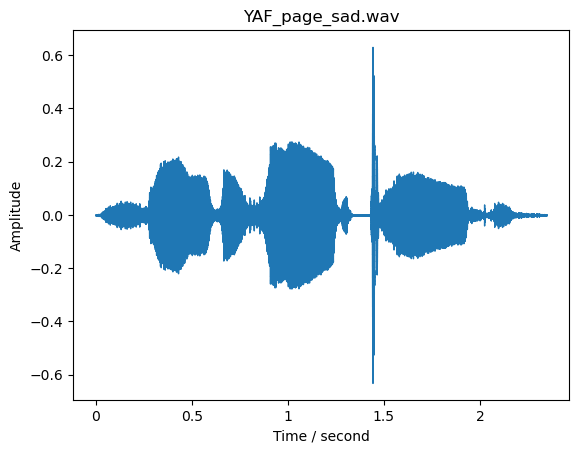

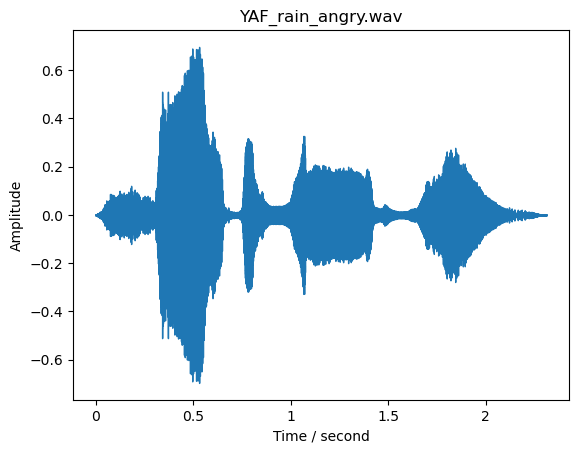

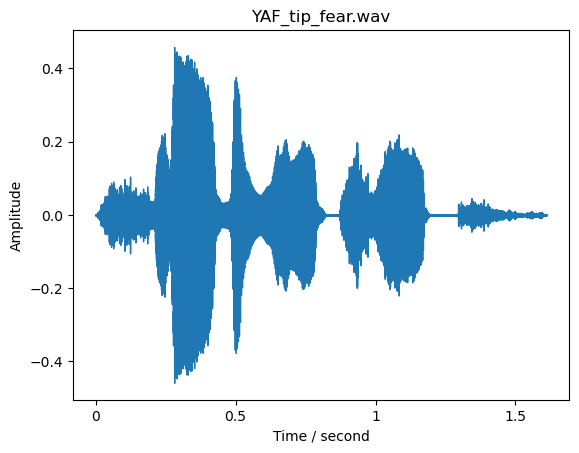

[array([0.00000000e+00, 4.81788188e-01, 9.63576376e-01, ...,
        2.20485546e+04, 2.20490364e+04, 2.20495182e+04]),
 array([0.00000000e+00, 4.26391816e-01, 8.52783633e-01, ...,
        2.20487208e+04, 2.20491472e+04, 2.20495736e+04]),
 array([0.00000000e+00, 4.32369897e-01, 8.64739794e-01, ...,
        2.20487029e+04, 2.20491353e+04, 2.20495676e+04]),
 array([0.00000000e+00, 6.20759551e-01, 1.24151910e+00, ...,
        2.20481377e+04, 2.20487585e+04, 2.20493792e+04])]

In [3]:
from random import randint
import matplotlib.pyplot as plt
import librosa

randInt = [randint(0,len(happyTrain)) for i in range(4)]
paths = [happyTrain[randInt[0]], sadTrain[randInt[1]], angryTrain[randInt[2]], fearTrain[randInt[3]]]
types = ["happy/", "sad/", "angry/", "fear/"]

freqValues = []
for i in range(4):
    
    signal, sample_rate = librosa.load(filePath + types[i] + paths[i])

    plt.figure(i)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.title(paths[i])
    plt.show()

    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freqValues.append(k/T)

freqValues

<h1>Step 3: Acoustic Feature Extraction.</h1></br>
You will extract acoustic features by using librosa or openSMILE. They are both popular Python libraries for automatic acoustic feature extraction.</br>
librosa: https://librosa.org/doc/main/index.html</br>
openSMILE: https://audeering.github.io/opensmile-python/

In [4]:
# Feature Extraction
import pandas as pd

happyTrainMFCC, happyTrainZCR, happyTrainMelSpec = [], [], []
happyTestMFCC, happyTestZCR, happyTestMelSpec = [], [], []

sadTrainMFCC, sadTrainZCR, sadTrainMelSpec = [], [], []
sadTestMFCC, sadTestZCR, sadTestMelSpec = [], [], []

angryTrainMFCC, angryTrainZCR, angryTrainMelSpec = [], [], []
angryTestMFCC, angryTestZCR, angryTestMelSpec = [], [], []

fearTrainMFCC, fearTrainZCR, fearTrainMelSpec = [], [], []
fearTestMFCC, fearTestZCR, fearTestMelSpec = [], [], []

In [5]:
# EXTRACT FEATURES for HAPPY. MFCC + ZCR + MelSpectrogram
for i in happyTrain:
    signal, sample_rate = librosa.load(filePath + "happy/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    happyTrainMFCC.append(df_mfccs)
    happyTrainZCR.append(df_zero_crossing_rate)
    happyTrainMelSpec.append(df_mel_spectrogram)

for i in happyTest:
    signal, sample_rate = librosa.load(filePath + "happy/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    happyTestMFCC.append(df_mfccs)
    happyTestZCR.append(df_zero_crossing_rate)
    happyTestMelSpec.append(df_mel_spectrogram)

In [6]:
# EXTRACT FEATURES for SAD. MFCC + ZCR + MelSpectrogram
for i in sadTrain:
    signal, sample_rate = librosa.load(filePath + "sad/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    sadTrainMFCC.append(df_mfccs)
    sadTrainZCR.append(df_zero_crossing_rate)
    sadTrainMelSpec.append(df_mel_spectrogram)

for i in sadTest:
    signal, sample_rate = librosa.load(filePath + "sad/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    sadTestMFCC.append(df_mfccs)
    sadTestZCR.append(df_zero_crossing_rate)
    sadTestMelSpec.append(df_mel_spectrogram)

In [7]:
# EXTRACT FEATURES for ANGRY. MFCC + ZCR + MelSpectrogram
for i in angryTrain:
    signal, sample_rate = librosa.load(filePath + "angry/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    angryTrainMFCC.append(df_mfccs)
    angryTrainZCR.append(df_zero_crossing_rate)
    angryTrainMelSpec.append(df_mel_spectrogram)

for i in angryTest:
    signal, sample_rate = librosa.load(filePath + "angry/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    angryTestMFCC.append(df_mfccs)
    angryTestZCR.append(df_zero_crossing_rate)
    angryTestMelSpec.append(df_mel_spectrogram)

In [8]:
# EXTRACT FEATURES for FEAR. MFCC + ZCR + MelSpectrogram
for i in fearTrain:
    signal, sample_rate = librosa.load(filePath + "fear/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    fearTrainMFCC.append(df_mfccs)
    fearTrainZCR.append(df_zero_crossing_rate)
    fearTrainMelSpec.append(df_mel_spectrogram)

for i in fearTest:
    signal, sample_rate = librosa.load(filePath + "fear/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    
    fearTestMFCC.append(df_mfccs)
    fearTestZCR.append(df_zero_crossing_rate)
    fearTestMelSpec.append(df_mel_spectrogram)

In [9]:
# Combine features into single container

happyTrainFeatures, happyTestFeatures = [] , []
sadTrainFeatures, sadTestFeatures = [], []
angryTrainFeatures, angryTestFeatures = [], []
fearTrainFeatures, fearTestFeatures = [], []

for i in range(len(happyTrain)):
    happyTrainFeatures.append(pd.concat([happyTrainMFCC[i], happyTrainZCR[i], happyTrainMelSpec[i]], axis=1))
    sadTrainFeatures.append(pd.concat([sadTrainMFCC[i], sadTrainZCR[i], sadTrainMelSpec[i]], axis=1))
    angryTrainFeatures.append(pd.concat([angryTrainMFCC[i], angryTrainZCR[i], angryTrainMelSpec[i]], axis=1))
    fearTrainFeatures.append(pd.concat([fearTrainMFCC[i], fearTrainZCR[i], fearTrainMelSpec[i]], axis=1))

for i in range(len(happyTest)):
    happyTestFeatures.append(pd.concat([happyTestMFCC[i], happyTestZCR[i], happyTestMelSpec[i]], axis=1))
    sadTestFeatures.append(pd.concat([sadTestMFCC[i], sadTestZCR[i], sadTestMelSpec[i]], axis=1))
    angryTestFeatures.append(pd.concat([angryTestMFCC[i], angryTestZCR[i], angryTestMelSpec[i]], axis=1))
    fearTestFeatures.append(pd.concat([fearTestMFCC[i], fearTestZCR[i], fearTestMelSpec[i]], axis=1))


# feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
print(happyTrainFeatures[0].head(5))

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -489.106506 -431.932281 -406.507874 -392.923492 -379.700409 -381.034576   
1  -17.349995  -47.244011  -63.028839  -65.978180  -79.045471  -86.335274   
2   47.954460   76.195343   74.337311   62.057510   51.045502   47.059143   
3   36.605881   15.621550   -3.656977   -8.385431  -10.586138  -15.052599   
4   20.112400   24.465528   23.341751   22.616314   19.342060   16.752602   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10  ...  Mel_Spectrogram_3  \
0 -383.055756 -373.675079 -369.863312 -374.960815  ...           0.001244   
1  -79.735184  -65.658264  -58.260036  -61.540257  ...           0.000075   
2   50.814953   44.275421   39.747726   35.576813  ...           0.000048   
3   -8.975591  -12.808340  -21.194107  -22.139610  ...           0.000056   
4   23.798809   23.741449   21.376181   17.435987  ...           0.000054   

   Mel_Spectrogram_4  Mel_Spectrogram_5  Mel_Spectrogram_6  Mel_Spectrogra

<h1>Step 4: Feature Post-processing.</h1></br>
Please refer to the slide of this class. </br>
Link: https://docs.google.com/presentation/d/1GUF_CaEy5rSnqnlOkxYhHGhfp6-1epCE5Q5BsYOfqt8/edit#slide=id.g1c126e18fd0_2_36

In [10]:
# Feature Matrix Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Min max scale train dataframes
for i in range(len(happyTrainFeatures)):
    df_scaled_happy = scaler.fit_transform(happyTrainFeatures[i].to_numpy())
    happyTrainFeatures[i] = pd.DataFrame(df_scaled_happy, columns=happyTrainFeatures[i].columns)
    df_scaled_sad = scaler.fit_transform(sadTrainFeatures[i].to_numpy())
    sadTrainFeatures[i] = pd.DataFrame(df_scaled_sad, columns=sadTrainFeatures[i].columns)
    df_scaled_angry = scaler.fit_transform(angryTrainFeatures[i].to_numpy())
    angryTrainFeatures[i] = pd.DataFrame(df_scaled_angry, columns=angryTrainFeatures[i].columns)
    df_scaled_fear = scaler.fit_transform(fearTrainFeatures[i].to_numpy())
    fearTrainFeatures[i] = pd.DataFrame(df_scaled_fear, columns=fearTrainFeatures[i].columns)

# Min max scale test dataframes
for i in range(len(happyTestFeatures)):
    df_scaled_happy = scaler.fit_transform(happyTestFeatures[i].to_numpy())
    happyTestFeatures[i] = pd.DataFrame(df_scaled_happy, columns=happyTestFeatures[i].columns)
    df_scaled_sad = scaler.fit_transform(sadTestFeatures[i].to_numpy())
    sadTestFeatures[i] = pd.DataFrame(df_scaled_sad, columns=sadTestFeatures[i].columns)
    df_scaled_angry = scaler.fit_transform(angryTestFeatures[i].to_numpy())
    angryTestFeatures[i] = pd.DataFrame(df_scaled_angry, columns=angryTestFeatures[i].columns)
    df_scaled_fear = scaler.fit_transform(fearTestFeatures[i].to_numpy())
    fearTestFeatures[i] = pd.DataFrame(df_scaled_fear, columns=fearTestFeatures[i].columns)
    
happyTrainFeatures[0].head(5)

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,Mel_Spectrogram_3,Mel_Spectrogram_4,Mel_Spectrogram_5,Mel_Spectrogram_6,Mel_Spectrogram_7,Mel_Spectrogram_8,Mel_Spectrogram_9,Mel_Spectrogram_10,Mel_Spectrogram_11,Mel_Spectrogram_12
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.055397,0.010378,0.003325,0.000996,0.003945,0.007646,0.004154,0.001941,0.003358,0.009769
1,0.878404,0.757070,0.714324,0.718591,0.697987,0.688399,0.699104,0.73697,0.760730,0.763439,...,0.001219,0.000958,0.001271,0.000215,0.000000,0.000000,0.000035,0.000369,0.001396,0.005934
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000270,0.000644,0.000000,0.002631,0.005210,0.008553
3,0.978869,0.880790,0.837798,0.845174,0.856919,0.854911,0.862193,0.86342,0.851220,0.859413,...,0.000344,0.000045,0.001514,0.000770,0.000446,0.001751,0.001216,0.000000,0.000000,0.003155
4,0.948158,0.898195,0.893946,0.913312,0.926399,0.929206,0.937732,0.95087,0.955149,0.955812,...,0.000249,0.000806,0.001556,0.001161,0.001600,0.004673,0.011367,0.014035,0.019398,0.033976


<h1>Step 5: Build your audio emotion recognition model.</h1></br>
Provide the extracted set of acoustic features from the training dataset to your classification model. Note that this is a multi-class classification problem. Please select appropriate classifiers since some of the classifiers are not applicable here (e.g., logistic regression).

In [11]:
# add emotion column to training dataframes
emotions = []
for i in range(4):
    for j in range(len(happyTrainMFCC)):
        if (i == 0):
            emotions.append("happy")
        elif (i == 1):
            emotions.append("sad")
        elif (i == 2):
            emotions.append("angry")
        elif (i == 3):
            emotions.append("fear")
            
testEmotions = []
for i in range(4):
    for j in range(len(happyTestMFCC)):
        if (i == 0):
            testEmotions.append("happy")
        elif (i == 1):
            testEmotions.append("sad")
        elif (i == 2):
            testEmotions.append("angry")
        elif (i == 3):
            testEmotions.append("fear")
            
masterMFCC = []
masterZCR = []
masterMelSpec = []

for i in range(len(happyTrainMFCC)):
    masterMFCC.append(average(average(happyTrainMFCC[i].to_numpy())))
    masterZCR.append(average(happyTrainZCR[i][0:77].to_numpy()))
    masterMelSpec.append(average(average(happyTrainMelSpec[i].to_numpy())))
for i in range(len(sadTrainMFCC)):
    masterMFCC.append(average(average(sadTrainMFCC[i].to_numpy())))
    masterZCR.append(average(sadTrainZCR[i][0:77].to_numpy()))
    masterMelSpec.append(average(average(sadTrainMelSpec[i].to_numpy())))
for i in range(len(angryTrainMFCC)):    
    masterMFCC.append(average(average(angryTrainMFCC[i].to_numpy())))
    masterZCR.append(average(angryTrainZCR[i][0:77].to_numpy()))
    masterMelSpec.append(average(average(angryTrainMelSpec[i].to_numpy())))
for i in range(len(fearTrainMFCC)):    
    masterMFCC.append(average(average(fearTrainMFCC[i].to_numpy())))
    masterZCR.append(average(fearTrainZCR[i][0:77].to_numpy()))
    masterMelSpec.append(average(average(fearTrainMelSpec[i].to_numpy())))
    
testMFCC = []
testZCR = []
testMelSpec = []

for i in range(len(happyTestMFCC)):
    testMFCC.append(average(average(happyTestMFCC[i].to_numpy())))
    testZCR.append(average(happyTestZCR[i].to_numpy()))
    testMelSpec.append(average(average(happyTestMelSpec[i].to_numpy())))
for i in range(len(sadTestMFCC)):
    testMFCC.append(average(average(sadTestMFCC[i].to_numpy())))
    testZCR.append(average(sadTestZCR[i].to_numpy()))
    testMelSpec.append(average(average(sadTestMelSpec[i].to_numpy())))
for i in range(len(angryTestMFCC)):    
    testMFCC.append(average(average(angryTestMFCC[i].to_numpy())))
    testZCR.append(average(angryTestZCR[i].to_numpy()))
    testMelSpec.append(average(average(angryTestMelSpec[i].to_numpy())))
for i in range(len(fearTestMFCC)):    
    testMFCC.append(average(average(fearTestMFCC[i].to_numpy())))
    testZCR.append(average(fearTestZCR[i].to_numpy()))
    testMelSpec.append(average(average(fearTestMelSpec[i].to_numpy())))

masterDF = pd.DataFrame(data={"mfcc": masterMFCC, "zcr": masterZCR, "mel_spec": masterMelSpec, "emotion": emotions})
testDF = pd.DataFrame(data={"mfcc": testMFCC, "zcr": testZCR, "mel_spec": testMelSpec, "emotion": testEmotions})

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(masterDF.iloc[:, 0:3], masterDF['emotion'])

knn_predicted = neigh.predict(testDF.iloc[:, 0:3])
knn_pred_proba = neigh.predict_proba(testDF.iloc[:, 0:3])

<h1>Step 6: Model evaluation.</h1></br>
Evaluate your model performance with the testing dataset. Please compare the performance of different classifiers using the same acoustic feature and the performance of the same classifier using different acoustic features. Finally, discuss your experimental results and submit the assignment report.

In [13]:
# Import popular libraries to utilize later
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [14]:
nbc = GaussianNB()
nbc.fit(masterDF.iloc[:, 0:3], masterDF['emotion'])

nbc_predicted = nbc.predict(testDF.iloc[:, 0:3])
nbc_pred_proba = nbc.predict_proba(testDF.iloc[:, 0:3])

In [15]:
rfc = RandomForestClassifier()
rfc.fit(masterDF.iloc[:, 0:3], masterDF['emotion'])

rfc_predicted = rfc.predict(testDF.iloc[:, 0:3])
rfc_pred_proba = rfc.predict_proba(testDF.iloc[:, 0:3])

In [16]:
print(classification_report(testDF['emotion'].to_numpy(), knn_predicted))
print(classification_report(testDF['emotion'].to_numpy(), nbc_predicted))
print(classification_report(testDF['emotion'].to_numpy(), rfc_predicted))

              precision    recall  f1-score   support

       angry       0.71      0.67      0.69        30
        fear       0.44      0.57      0.49        30
       happy       0.38      0.27      0.31        30
         sad       0.47      0.50      0.48        30

    accuracy                           0.50       120
   macro avg       0.50      0.50      0.50       120
weighted avg       0.50      0.50      0.50       120

              precision    recall  f1-score   support

       angry       0.85      0.57      0.68        30
        fear       0.68      0.57      0.62        30
       happy       0.61      0.47      0.53        30
         sad       0.56      0.97      0.71        30

    accuracy                           0.64       120
   macro avg       0.67      0.64      0.63       120
weighted avg       0.67      0.64      0.63       120

              precision    recall  f1-score   support

       angry       0.91      0.67      0.77        30
        fear       0.

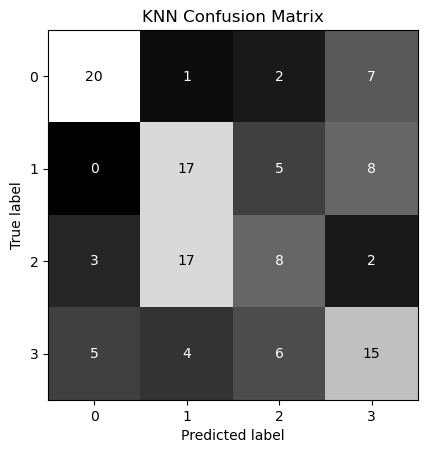

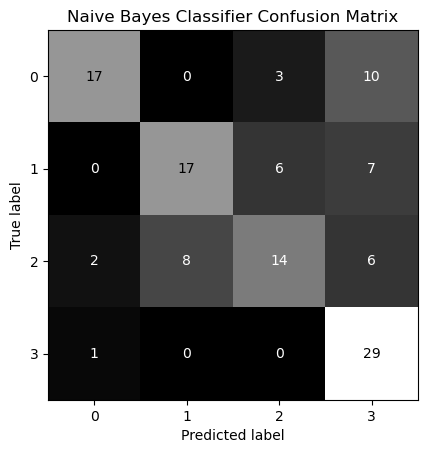

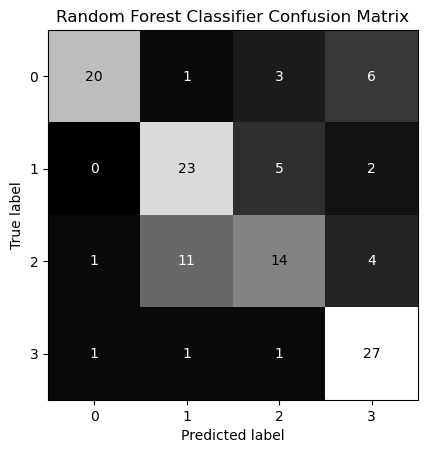

<Figure size 3000x1500 with 0 Axes>

In [17]:
models = ['KNN', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [knn_predicted, nbc_predicted, rfc_predicted]
pred_probabilities = [knn_pred_proba, nbc_pred_proba, rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(testDF['emotion'].to_numpy().ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1
